# Pymaceuticals Inc.
---

### Analysis

From the generated report, some of the key findings we have found are:

* Capomulin and Ramicane are shown to be more effective and reducing the tumor volume in comparison with the other drug regimens. Both drugs, as shown in the Summary Statistics Table, have lower stats in st. dev of the tumor volume. This shows that the data is more clustered around the mean which makes both drugs more reliable. However, we do have to note that both drugs had the most observed timepoints out of all the listed drug treatments as shown in the bar chart. This could skew the accuracy of the results. 
* We have also determined that the difference in size of the study group between male and female mice were not that significant. With the male population being at 51% and the female population at 49%, it is hard to determine if the sex of the mouse plays a significance for the efficacy of the drugs used. More information will be needed for this area of study. 
* There is a positive correlation between mouse weight and tumor volume. With the correlation coefficient at 0.84, we can determine that there is a strong correlation between the mouse weight and tumor volume. This is backed by the scatter plot and the linear regression model. Therefore we can conclude that the volume of tumors will be larger in heavier mice. 

Because there is a lack of coherence between timepoints observed for each drug, and possible other factors that were missing from the given data, there needs to be further studies and analysis conducted to back up these findings. 
 

## Setup

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(mouse_metadata, study_results, how = "left", on = ["Mouse ID", "Mouse ID"])

# Display the data table for preview
merged_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Create dataframe
df = pd.DataFrame(merged_data)

# Checking the number of mice.
mice_count = len(merged_data['Mouse ID'].unique())
mice_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = df.duplicated(["Mouse ID", "Timepoint"], keep=False)
ID_mice = df.loc[duplicate_mice, "Mouse ID"].unique()
ID_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_id = df.loc[df["Mouse ID"]=="g989"]
duplicate_mouse_id

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged_data.drop(duplicate_mouse_id.index)
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_df['Mouse ID'].unique())

248

## Summary Statistics

In [7]:
print(merged_data.columns)

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
group_regimen =  merged_data.groupby("Drug Regimen")["Tumor Volume (mm3)"]

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_mean = group_regimen.mean()
tumor_median = group_regimen.median()
tumor_variance = group_regimen.var()
tumor_st_dev = group_regimen.std()
tumor_SEM = group_regimen.sem()

# Assemble the resulting series into a single summary DataFrame.
Summary_DF = pd.DataFrame({
    'Mean Tumor Volume': tumor_mean,
    'Median Tumor Volume': tumor_median,
    'Tumor Volume Variance': tumor_variance,
    'Tumor Volume St. Dev': tumor_st_dev,
    'Tumor Volume SEM':tumor_SEM 
})

Summary_DF


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume St. Dev,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

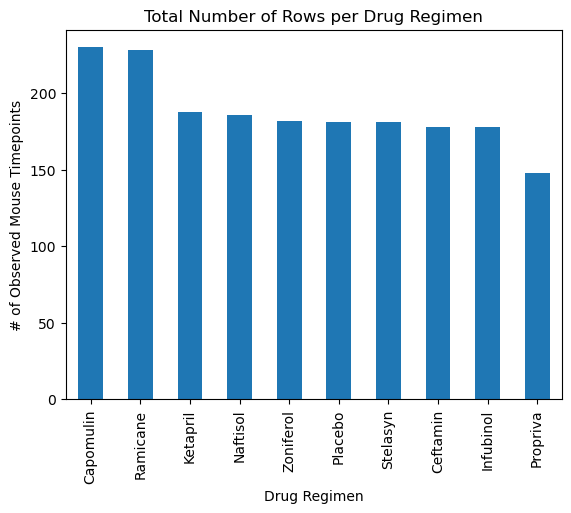

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
xlabel = "Drug Regimen"
ylabel = "# of Observed Mouse Timepoints"

# Sort Data
bar_plot = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].count().sort_values(ascending=False)

# Plot Data & Set the Axis Labels
bar_chart = bar_plot.plot(kind="bar")
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title("Total Number of Rows per Drug Regimen")


# Show Bar Chart
plt.show()


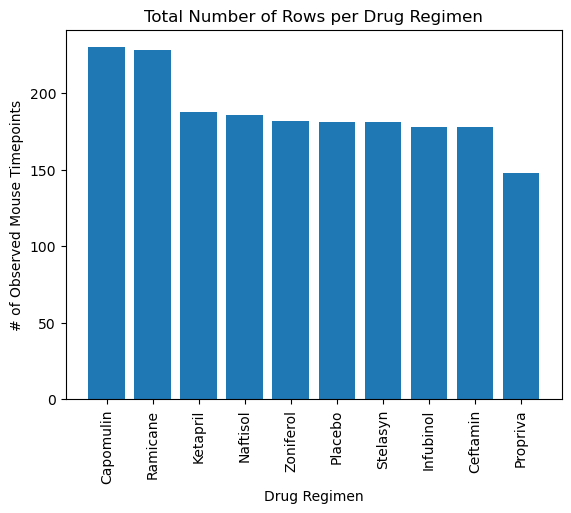

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

pyplot = clean_df["Drug Regimen"].value_counts()

# Create plot 
plt.bar(pyplot.index, pyplot.values)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title("Total Number of Rows per Drug Regimen")
plt.xticks(rotation=90)

# Show plot
plt.show()


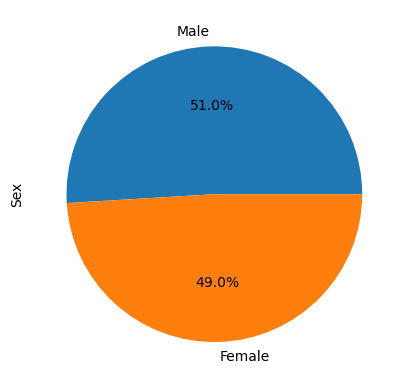

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pandas_distribution = clean_df["Sex"].value_counts()

# Generate Pie Chart
pandas_distribution.plot(kind="pie", autopct = '%1.1f%%')

plt.show()

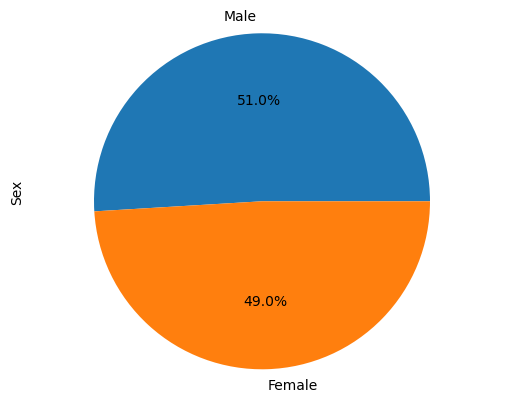

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pyplot_distr = clean_df["Sex"].value_counts()

# Generate a pie chart
plt.pie(pyplot_distr.values,labels=pyplot_distr.index,autopct ='%1.1f%%')
plt.axis("equal")
plt.text(-1.5, 0, "Sex", rotation='vertical', fontsize = 10)

plt.show()
plt.close()

## Quartiles, Outliers and Boxplots

In [13]:
print(clean_df.columns)

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')


In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = clean_df.groupby("Mouse ID")["Timepoint"].last().sort_values()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
updated_df = pd.merge(greatest_timepoint, clean_df, on = ["Mouse ID", "Timepoint"], how = "left")
updated_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b447,0,Ceftamin,Male,2,30,45.0,0
1,x226,0,Ceftamin,Male,23,28,45.0,0
2,f932,0,Ketapril,Male,15,29,45.0,0
3,x336,0,Naftisol,Female,4,29,45.0,0
4,l872,0,Placebo,Male,19,30,45.0,0


In [15]:
# Set treatments as a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    last_timepoint = updated_df.loc[updated_df["Drug Regimen"]==treatment, "Tumor Volume (mm3)"]
    tumor_vol.append(last_timepoint)
    quartiles = last_timepoint.quantile([0.25, 0.5, 0.75])
    q1 = quartiles[0.25]
    q3 = quartiles[0.75]
    iqr = q3-q1 
    
    # Determine outliers using upper and lower bounds
    upper_bound = q3 + 1.5*iqr
    lower_bound = q1 - 1.5*iqr
    
    # Print out Outliers
    outliers = last_timepoint.loc[(last_timepoint>upper_bound) | (last_timepoint<lower_bound)]
    
    if not outliers.empty:
        
        print(f" {treatment}'s potential outliers: {outliers}")
    
    else: 
        print(f" {treatment} has no outliers")


 Capomulin has no outliers
 Ramicane has no outliers
 Infubinol's potential outliers: 19    36.321346
Name: Tumor Volume (mm3), dtype: float64
 Ceftamin has no outliers


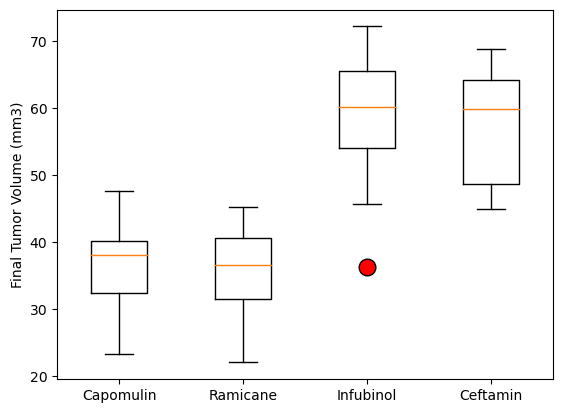

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, tumorplot = plt.subplots()

# Customize the properties of the outlier 
flierprops = dict(markerfacecolor='r', markersize=12)

# Create boxplot & set ylabel
tumorplot.boxplot(tumor_vol, labels=treatments, flierprops=flierprops)
tumorplot.set_ylabel('Final Tumor Volume (mm3)')

# Plot boxplot
plt.show()

## Line and Scatter Plots

In [17]:
# Find a single mouse treated with Capomulin
single_mouse = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin", "Mouse ID"].unique()
print(single_mouse)

['s185' 'x401' 'm601' 'f966' 'u364' 'y793' 'r554' 'm957' 't565' 'i738'
 'w914' 'g288' 'l897' 'b742' 'b128' 'j246' 'j119' 'w150' 'v923' 'g316'
 's710' 'l509' 'r944' 'i557' 'r157']


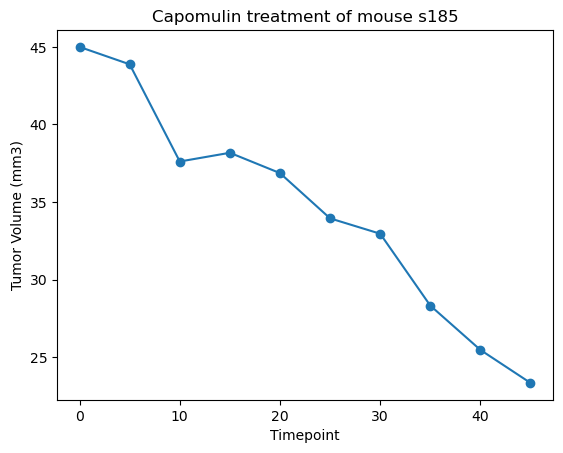

In [18]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = "s185"
capomulin_line = clean_df.loc[(clean_df["Drug Regimen"] == "Capomulin") & (clean_df["Mouse ID"] == mouse_id)]

# Plot line plot
plt.plot(capomulin_line["Timepoint"], capomulin_line["Tumor Volume (mm3)"], marker ="o")
plt.title(f"Capomulin treatment of mouse s185")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


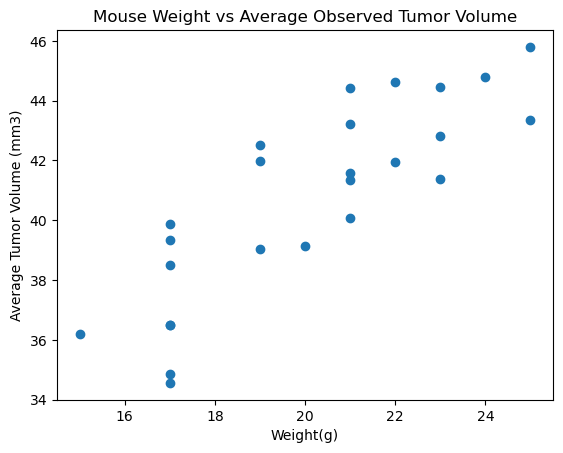

In [19]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_scatter = clean_df[clean_df["Drug Regimen"] == "Capomulin"]

# Calculate the average observed tumor volume
atv = capomulin_scatter.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# Find the corresponding mouse weight 
weight = capomulin_scatter.groupby("Mouse ID")["Weight (g)"].mean()

# Plot the scatter plot
plt.scatter(weight, atv)
plt.title(f"Mouse Weight vs Average Observed Tumor Volume")
plt.xlabel("Weight(g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84.


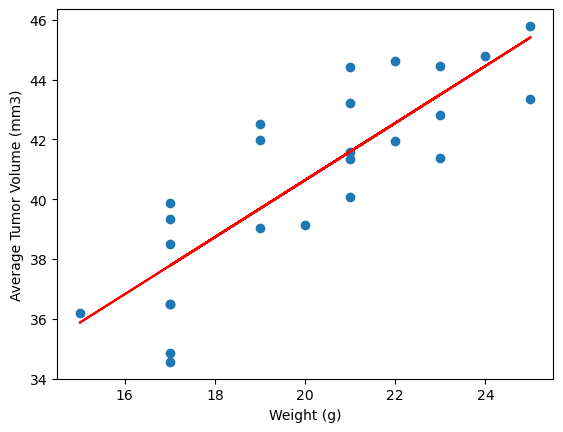

In [20]:
# Calculate the correlation coefficient and a linear regression model for mouse weight and average observed tumor volume for the entire Capomulin regimen
x_values = weight
y_values = atv

# Find correlation
correlation = round(st.pearsonr(weight, atv)[0],2)
print (f"The correlation between mouse weight and the average tumor volume is {correlation}.")

# Plot linear regression model
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color = "red")
plt.xlabel("Weight (g)")
plt.ylabel(f"Average Tumor Volume (mm3)") 

plt.show()

